First 5 Rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN

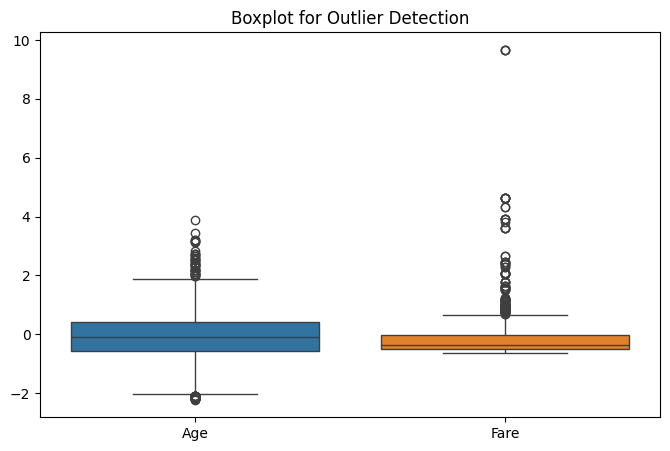


Shape After Removing Outliers: (775, 9)

Final Cleaned Dataset Preview:
   Survived  Pclass  Sex       Age     SibSp     Parch      Fare  Embarked_Q  \
0         0       3    1 -0.565736  0.432793 -0.473674 -0.502445       False   
2         1       3    0 -0.258337 -0.474545 -0.473674 -0.488854       False   
3         1       1    0  0.433312  0.432793 -0.473674  0.420730       False   
4         0       3    1  0.433312 -0.474545 -0.473674 -0.486337       False   
5         0       3    1 -0.104637 -0.474545 -0.473674 -0.478116        True   

   Embarked_S  
0        True  
2        True  
3        True  
4        True  
5       False  

Final Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 775 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    775 non-null    int64  
 1   Pclass      775 non-null    int64  
 2   Sex         775 non-null    int64  
 3   Age         775 non-

In [5]:
# ==========================================
# TASK 1: Data Cleaning & Preprocessing
# Dataset: Titanic
# ==========================================

# 1️⃣ Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler

# 2️⃣ Load Dataset
# Make sure train.csv is uploaded to Colab
df = pd.read_csv('/content/Titanic-Dataset.csv')

print("First 5 Rows:")
print(df.head())

print("\nDataset Information:")
print(df.info())

print("\nMissing Values Before Handling:")
print(df.isnull().sum())

# ==========================================
# 3️⃣ Handling Missing Values
# ==========================================

# Fill Age with Median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill Embarked with Mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop Cabin (too many missing values)
df.drop(columns=['Cabin'], inplace=True)

print("\nMissing Values After Handling:")
print(df.isnull().sum())

# ==========================================
# 4️⃣ Drop Irrelevant Columns
# ==========================================

# These columns are not useful for ML modeling
df.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

print("\nColumns After Dropping Irrelevant Features:")
print(df.columns)

# ==========================================
# 5️⃣ Encoding Categorical Variables
# ==========================================

# Encode Sex using Label Encoding
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])   # male=1, female=0

# One-Hot Encode Embarked
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

print("\nDataset After Encoding:")
print(df.head())

# ==========================================
# 6️⃣ Feature Scaling (Standardization)
# ==========================================

scaler = StandardScaler()

numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("\nDataset After Standardization:")
print(df.head())

# ==========================================
# 7️⃣ Outlier Detection (Boxplot)
# ==========================================

plt.figure(figsize=(8,5))
sns.boxplot(data=df[['Age', 'Fare']])
plt.title("Boxplot for Outlier Detection")
plt.show()

# ==========================================
# 8️⃣ Outlier Removal using IQR
# ==========================================

def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

df = remove_outliers(df, 'Fare')

print("\nShape After Removing Outliers:", df.shape)

# ==========================================
# 9️⃣ Final Dataset Preview
# ==========================================

print("\nFinal Cleaned Dataset Preview:")
print(df.head())

print("\nFinal Dataset Info:")
print(df.info())
